In [1]:
# Importing necessary libraries
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing the dataset
data =pd.read_csv('bootstrapped data.csv')
X = data.iloc[0:1400,:-1]
y = data.iloc[0:1400,-1]
y = np.array(y).reshape(-1,1)
print(X.shape)
print(y.shape)

(1400, 15)
(1400, 1)


In [3]:
# Normalization followed by Splitting data into train and test sets
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(1120, 15) (280, 15) (1120, 1) (280, 1)


In [4]:
# Creating a model
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
sgd = tf.keras.optimizers.SGD(learning_rate= 0.001)

opt = adam

model = Sequential()

# Input layer
model.add(Dense(15, kernel_initializer='normal', input_dim = x_train.shape[1], activation = 'relu'))

# Hidden layers
model.add(Dense(30, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(45, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(60, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(15, kernel_initializer='normal', activation = 'relu'))
# model.add(Dense(2048, kernel_initializer='normal', activation = 'relu'))

# Output layer
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))

model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 45)                1395      
_________________________________________________________________
dense_4 (Dense)              (None, 60)                2760      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                915       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 5,806
Trainable params: 5,806
Non-trainable params: 0
____________________________________________________

In [5]:
checkpoint_name = './checkpoints/Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [6]:
import os
import glob

files = glob.glob('./checkpoints/*.hdf5')
for f in files:
    os.remove(f)

In [7]:
model.fit(x_train, y_train, epochs=500, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Train on 896 samples, validate on 224 samples
Epoch 1/500
896/896 [==============================] - 1s 692us/step - loss: 128.0339 - mean_absolute_error: 128.0339 - val_loss: 129.5341 - val_mean_absolute_error: 129.5341

Epoch 00001: val_loss improved from inf to 129.53409, saving model to ./checkpoints/Weights-001--129.53409.hdf5
Epoch 2/500
896/896 [==============================] - 0s 40us/step - loss: 128.0321 - mean_absolute_error: 128.0321 - val_loss: 129.5323 - val_mean_absolute_error: 129.5323

Epoch 00002: val_loss improved from 129.53409 to 129.53228, saving model to ./checkpoints/Weights-002--129.53228.hdf5
Epoch 3/500
896/896 [==============================] - 0s 40us/step - loss: 128.0303 - mean_absolute_error: 128.0303 - val_loss: 129.5304 - val_mean_absolute_error: 129.5303

Epoch 00003: val_loss improved from 129.53228 to 129.53035, saving model to ./checkpoints/Weights-003--129.53035.hdf5
Epoch 4/500
896/896 [==============================] - 0s 46us/step - loss: 128.

C:\Users\krishnakant\anaconda3\envs\MyEnv\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00004: val_loss improved from 129.53035 to 129.52833, saving model to ./checkpoints/Weights-004--129.52833.hdf5
Epoch 5/500
896/896 [==============================] - 0s 53us/step - loss: 128.0262 - mean_absolute_error: 128.0262 - val_loss: 129.5261 - val_mean_absolute_error: 129.5261

Epoch 00005: val_loss improved from 129.52833 to 129.52610, saving model to ./checkpoints/Weights-005--129.52610.hdf5
Epoch 6/500
896/896 [==============================] - 0s 41us/step - loss: 128.0239 - mean_absolute_error: 128.0239 - val_loss: 129.5236 - val_mean_absolute_error: 129.5236

Epoch 00006: val_loss improved from 129.52610 to 129.52364, saving model to ./checkpoints/Weights-006--129.52364.hdf5
Epoch 7/500
896/896 [==============================] - 0s 38us/step - loss: 128.0213 - mean_absolute_error: 128.0213 - val_loss: 129.5208 - val_mean_absolute_error: 129.5208

Epoch 00007: val_loss improved from 129.52364 to 129.52080, saving model to ./checkpoints/Weights-007--129.52080.hdf5
Ep

In [8]:
files = glob.glob('./checkpoints/*.hdf5')
filename = files[-1]
isinstance(filename, str)
wt_file = filename.split('\\')[-1]
print(wt_file)

Weights-500--4.76845.hdf5


In [9]:
# Load wights file of the best model :
weights_file = './checkpoints/{}'.format(wt_file) # choose the best checkpoint 
model.load_weights(weights_file) # load itWeights-466--0.29823
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])

In [10]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred).reshape(-1,1)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 score is:',r2,'\nMean squared error is:',mse)
score = model.score(X_test,y_test)
MAE = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is:', MAE)
r = pd.DataFrame(np.concatenate((y_test,y_pred), axis = 1)).corr()
pear_coff = r.iloc[0,1]
print(pear_coff)
index = pear_coff/MSE
print(index)
# y_combined = np.concatenate((y_test,y_pred),axis = 1)
# # y_combined = np.concatenate((y_test,y_pred),axis = 1)
# y_combined[:10]

R2 score is: 0.8152724026768142 
Mean squared error is: 29.273101400412063


array([[102.        , 106.91899109],
       [130.        , 131.21238708],
       [138.        , 132.38153076],
       [132.        , 131.22351074],
       [139.        , 132.72940063],
       [138.        , 132.38153076],
       [123.        , 132.05493164],
       [132.        , 132.57064819],
       [127.        , 128.27716064],
       [132.        , 131.32275391]])

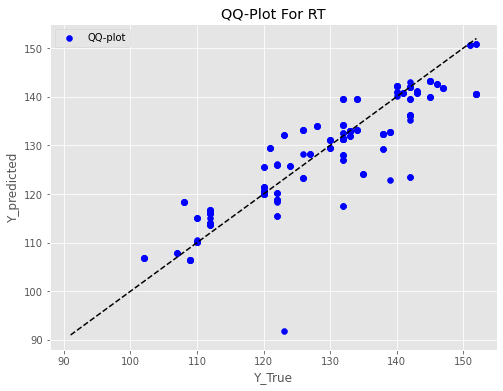

In [15]:
# Visualizing model
maxi = max(max(y_pred), max(y_test))
mini = min(min(y_pred), min(y_test))
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.scatter(y_test, y_pred, label='QQ-plot', c = 'b', marker='o')
plt.plot(range(int(mini), int(maxi+1)), range(int(mini), int(maxi+1)),'--k')
plt.title('QQ-Plot For RT')
plt.xlabel('Y_True')
plt.ylabel('Y_predicted')
plt.legend(loc='best')
plt.show()

In [ ]:

# Calculating FastDTW
from fastdtw import fastdtw
from scipy.spatial.distance import sqeuclidean


distance, path = fastdtw(y_test,y_pred, dist=sqeuclidean)

print('FastDTW: ',distance)

In [ ]:
# Calculating DTW
from dtw import dtw
from scipy.spatial.distance import sqeuclidean
d, cost_matrix, acc_cost_matrix, path = dtw(y_test,y_pred, dist=sqeuclidean)
print('DTW: ',d)

In [ ]:
# Calculating cDTW
from cdtw import pydtw
d = pydtw.dtw(y_test,y_pred,pydtw.Settings(step = 'p0sym',     
                                window = 'palival', 
                                param = 2.0,        
                                norm = False,       
                                compute_path = True))
d.get_dist()